In [19]:
import pandas as pd


In [20]:
URL = "C:\\Users\\USER DK\\Downloads\\Asuransi Konvensional Premi dan Klaim 29 Agu 2025.xlsx"
df = pd.read_excel(URL, sheet_name="Data", header=3)
df = df.rename(columns={df.columns[0]:"Jenis Asuransi"})
df.head()

,Jenis Asuransi,2018,2019,2020,2021,2022,2023,2024,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1,2024.1
0,Asuransi Jiwa,142358878641300,153263706341360,150006466764750,159684405278750,157526078696270,147565207855270,141299345433940,186047238064110,185332774599510,171932037731570,184324033102540,169952750426860,159024885970490,162684413754770
1,Asuransi Umum,29452935227230,36239298238630,37475354390630,32359211993450,40781935123570,51215930789680,55490141835230,69900990627340,80123057648620,76887930513900,76872491849100,89657613226440,117562196592900,124055020738190
2,Reasuransi,7563734499880,9850801077880,16478787071790,12669486576080,13157846345030,15327465185500,13528886468570,18379576673210,21971108250280,27124464891490,23224017386900,24298364550280,27103850845910,25933585806020


In [21]:
df_klaim = df.iloc[:, 0:8]
df_klaim.head()

,Jenis Asuransi,2018,2019,2020,2021,2022,2023,2024
0,Asuransi Jiwa,142358878641300,153263706341360,150006466764750,159684405278750,157526078696270,147565207855270,141299345433940
1,Asuransi Umum,29452935227230,36239298238630,37475354390630,32359211993450,40781935123570,51215930789680,55490141835230
2,Reasuransi,7563734499880,9850801077880,16478787071790,12669486576080,13157846345030,15327465185500,13528886468570


In [22]:
df_premi = df.iloc[:, [0] + list(range(8, 15))]
df_premi.head()

,Jenis Asuransi,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1,2024.1
0,Asuransi Jiwa,186047238064110,185332774599510,171932037731570,184324033102540,169952750426860,159024885970490,162684413754770
1,Asuransi Umum,69900990627340,80123057648620,76887930513900,76872491849100,89657613226440,117562196592900,124055020738190
2,Reasuransi,18379576673210,21971108250280,27124464891490,23224017386900,24298364550280,27103850845910,25933585806020


In [23]:
df_premi.columns = df_klaim.columns
df_premi.head()

,Jenis Asuransi,2018,2019,2020,2021,2022,2023,2024
0,Asuransi Jiwa,186047238064110,185332774599510,171932037731570,184324033102540,169952750426860,159024885970490,162684413754770
1,Asuransi Umum,69900990627340,80123057648620,76887930513900,76872491849100,89657613226440,117562196592900,124055020738190
2,Reasuransi,18379576673210,21971108250280,27124464891490,23224017386900,24298364550280,27103850845910,25933585806020


In [24]:
klaim_long = df_klaim.melt(
    id_vars="Jenis Asuransi",
    var_name="Tahun",
    value_name="Klaim"
)
klaim_long.head()

,Jenis Asuransi,Tahun,Klaim
0,Asuransi Jiwa,2018,142358878641300
1,Asuransi Umum,2018,29452935227230
2,Reasuransi,2018,7563734499880
3,Asuransi Jiwa,2019,153263706341360
4,Asuransi Umum,2019,36239298238630


In [25]:
premi_long = df_premi.melt(
    id_vars="Jenis Asuransi",
    var_name="Tahun",
    value_name="Premi")
premi_long.head()

,Jenis Asuransi,Tahun,Premi
0,Asuransi Jiwa,2018,186047238064110
1,Asuransi Umum,2018,69900990627340
2,Reasuransi,2018,18379576673210
3,Asuransi Jiwa,2019,185332774599510
4,Asuransi Umum,2019,80123057648620


In [26]:
df_final = pd.merge(klaim_long, premi_long, on=['Jenis Asuransi', 'Tahun'])
df_final["Loss Ratio"] =df_final["Klaim"] / df_final["Premi"]
df_final

,Jenis Asuransi,Tahun,Klaim,Premi,Loss Ratio
0,Asuransi Jiwa,2018,142358878641300,186047238064110,0.765176
1,Asuransi Umum,2018,29452935227230,69900990627340,0.421352
2,Reasuransi,2018,7563734499880,18379576673210,0.411529
3,Asuransi Jiwa,2019,153263706341360,185332774599510,0.826965
4,Asuransi Umum,2019,36239298238630,80123057648620,0.452295
5,Reasuransi,2019,9850801077880,21971108250280,0.448352
6,Asuransi Jiwa,2020,150006466764750,171932037731570,0.872475
7,Asuransi Umum,2020,37475354390630,76887930513900,0.487402
8,Reasuransi,2020,16478787071790,27124464891490,0.607525
9,Asuransi Jiwa,2021,159684405278750,184324033102540,0.866324


In [27]:
std_dev_per_usaha = df_final.groupby("Jenis Asuransi")["Loss Ratio"].std()
std_dev_per_usaha

Jenis Asuransi
Asuransi Jiwa    0.056675
Asuransi Umum    0.023006
Reasuransi       0.068005
Name: Loss Ratio, dtype: float64

* Asuransi Umum (Si Stabil) adalah lini bisnis paling stabil dan dapat diprediksi. Fluktuasi Loss Ratio tahunannya sangat kecil
* Asuransi Jiwa (Si Moderat) Memiliki tingkat volatilitas moderat. Kinerjanya lebih sulit diprediksi daripada Asuransi Umum, tetapi jauh lebih stabil daripada Reasuransi.
* Reasuransi (Si Volatil) adalah lini bisnis paling volatil dan paling sulit diprediksi. Kinerjanya dapat berayun secara ekstrem dari tahun ke tahun.


In [28]:
Q1 = df_final['Loss Ratio'].quantile(0.25)
Q3 = df_final['Loss Ratio'].quantile(0.75)
IQR = Q3 -Q1

batas_bawah = Q1 - (1.5 * IQR)
batas_atas = Q3 + (1.5 * IQR)

print(f"Batas Bawah untuk Outlier: {batas_bawah:.4f}")
print(f"Batas Atas untuk Outlier: {batas_atas:.4f}")

Batas Bawah untuk Outlier: -0.1196
Batas Atas untuk Outlier: 1.3949


In [29]:
outlier_iqr = df_final[(df_final['Loss Ratio'] < batas_bawah) | (df_final['Loss Ratio'] > batas_atas)]
print("\n--- Outlier yang Ditemukan (Metode IQR)---")

if outlier_iqr.empty:
    print("Tidak ada outlier yang ditemukan.")
else:
    print(outlier_iqr)


--- Outlier yang Ditemukan (Metode IQR)---
Tidak ada outlier yang ditemukan.


* Hasil ini memperkuat bahwa Reasuransi kinerjanya yang besar adalah bagian dari karakteristik normal bisnisnya, bukan karena satu tahun anomali yang luar biasa. Rentang "normal"-nya memang lebar dan Asuransi Umum memiliki kinerja sangat konsisten dan beroperasi dalam rentang yang sangat sempit dan dapat diprediksi.

In [30]:
total_per_usaha = df_final.groupby("Jenis Asuransi").agg(
    Total_klaim = ("Klaim", "sum"),
    Total_premi = ("Premi", "sum"),
).reset_index()
total_per_usaha

,Jenis Asuransi,Total_klaim,Total_premi
0,Asuransi Jiwa,1051704089011640,1219298133649850
1,Asuransi Umum,283014807598420,635059301196490
2,Reasuransi,88577007224730,168034968404090


In [31]:
total_per_usaha["Total Loss Ratio"] = total_per_usaha["Total_klaim"] / total_per_usaha["Total_premi"]

In [32]:
rangking_loss_ratio = total_per_usaha.sort_values(by= "Total Loss Ratio", ascending=False)
rangking_loss_ratio

,Jenis Asuransi,Total_klaim,Total_premi,Total Loss Ratio
0,Asuransi Jiwa,1051704089011640,1219298133649850,0.862549
2,Reasuransi,88577007224730,168034968404090,0.527134
1,Asuransi Umum,283014807598420,635059301196490,0.445651


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER DK\AppData\Local\Temp\ipykernel_13368\2011757294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


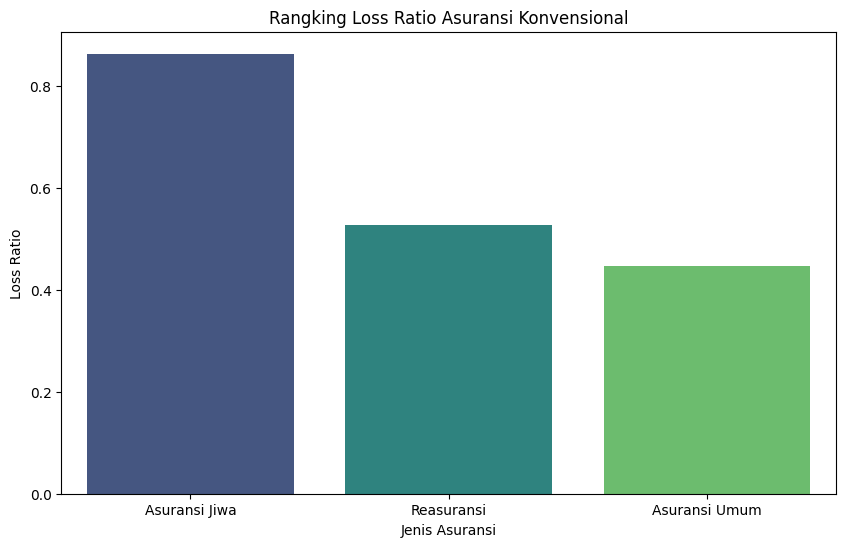

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=rangking_loss_ratio,
    x="Jenis Asuransi",
    y="Total Loss Ratio",
    palette="viridis"
)
plt.title("Rangking Loss Ratio Asuransi Konvensional")
plt.xlabel("Jenis Asuransi")
plt.ylabel("Loss Ratio")
plt.show()